###  Restaruant Order Analysis
#### We have teo flat files to analyze orders.csv and menu_items.csv we need to use both to answer the following questions.
1.what items drive the most and least revenue?

2.which time periode have the heighst and lowest revenue?


### Importing the order file

In [4]:
import pandas as pd
df_orders =pd.read_csv(r"C:\Users\adnan\Downloads\Restaurant+Orders+CSV\order_details.csv")
df_orders.head(10)

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0
5,6,2,1/1/23,11:57:40 AM,106.0
6,7,3,1/1/23,12:12:28 PM,117.0
7,8,3,1/1/23,12:12:28 PM,119.0
8,9,4,1/1/23,12:16:31 PM,117.0
9,10,5,1/1/23,12:21:30 PM,117.0


In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB


In [8]:
df_orders.loc[:, 'time_stampe'] = df_orders['order_date'].astype(str) + '-' + df_orders['order_time'].astype(str)

In [10]:
df_orders = df_orders.drop(columns=['order_date', 'order_time'])

In [32]:

df_orders['time_stampe'] = pd.to_datetime(df_orders['time_stampe'], format='%m/%d/%y-%I:%M:%S %p')

In [34]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   item_id           12097 non-null  float64       
 3   time_stampe       12097 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 472.5 KB


### Cleaning up the missing rows 

In [36]:
df_orders= df_orders.dropna()

### Joining menu items 

In [38]:
df_menu=pd.read_csv(r"C:\Users\adnan\Downloads\Restaurant+Orders+CSV\menu_items.csv")
df_menu.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [40]:
df_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [42]:
df_menu_order=df_orders.merge(df_menu,how="left",left_on="item_id",right_on="menu_item_id").drop("menu_item_id",axis=1)
df_menu_order.head()

,order_details_id,order_id,item_id,time_stampe,item_name,category,price
0,1,1,109.0,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95
1,2,2,108.0,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50
2,3,2,124.0,2023-01-01 11:57:40,Spaghetti,Italian,14.50
3,4,2,117.0,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95
4,5,2,129.0,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50


### Adding Tax and Total revenue columns 

In [44]:
df_menu_order['sales_tax']=(df_menu_order.price*0.08).round(2)
df_menu_order['total_revenue']=df_menu_order.price+df_menu_order.sales_tax
df_menu_order.head()

,order_details_id,order_id,item_id,time_stampe,item_name,category,price,sales_tax,total_revenue
0,1,1,109.0,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2,2,108.0,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,3,2,124.0,2023-01-01 11:57:40,Spaghetti,Italian,14.50,1.16,15.66
3,4,2,117.0,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95,1.04,13.99
4,5,2,129.0,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50,1.24,16.74


<Axes: ylabel='item_name'>

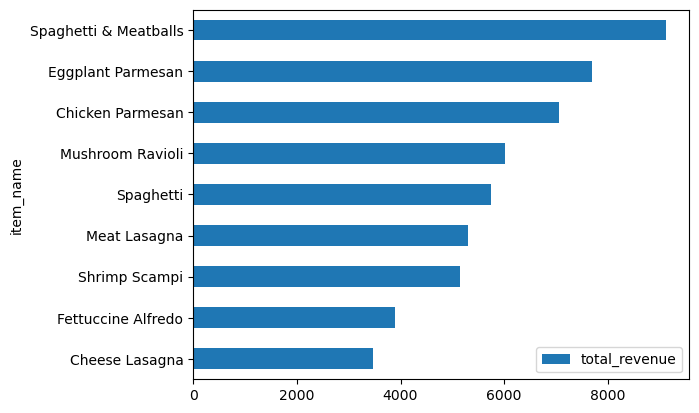

In [46]:
(df_menu_order
 .query("category =='Italian'")
 .groupby("item_name")
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
)

### Analyzing Busiest time

In [48]:
df_menu_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   item_id           12097 non-null  float64       
 3   time_stampe       12097 non-null  datetime64[ns]
 4   item_name         12097 non-null  object        
 5   category          12097 non-null  object        
 6   price             12097 non-null  float64       
 7   sales_tax         12097 non-null  float64       
 8   total_revenue     12097 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 850.7+ KB


In [83]:
df_menu_order['dayofweek']=df_menu_order['time_stampe'].dt.day_name()
df_menu_order['hour']= df_orders['time_stampe'].dt.hour


In [87]:
df_menu_order['hour_for'] = df_menu_order['hour'].apply(lambda x: f"{x%12 or 12} {'AM' if x < 12 else 'PM'}")

In [89]:
df_menu_order

,order_details_id,order_id,item_id,time_stampe,item_name,category,price,sales_tax,total_revenue,dayofweek,hour,hour_for
0,1,1,109.0,2023-01-01 11:38:36,Korean Beef Bowl,Asian,17.95,1.44,19.39,Sunday,11.0,11.0 AM
1,2,2,108.0,2023-01-01 11:57:40,Tofu Pad Thai,Asian,14.50,1.16,15.66,Sunday,11.0,11.0 AM
2,3,2,124.0,2023-01-01 11:57:40,Spaghetti,Italian,14.50,1.16,15.66,Sunday,11.0,11.0 AM
3,4,2,117.0,2023-01-01 11:57:40,Chicken Burrito,Mexican,12.95,1.04,13.99,Sunday,11.0,11.0 AM
4,5,2,129.0,2023-01-01 11:57:40,Mushroom Ravioli,Italian,15.50,1.24,16.74,Sunday,11.0,11.0 AM
...,...,...,...,...,...,...,...,...,...,...,...,...
12092,12230,5369,109.0,2023-03-31 22:05:04,Korean Beef Bowl,Asian,17.95,1.44,19.39,Friday,12.0,12 PM
12093,12231,5369,129.0,2023-03-31 22:05:04,Mushroom Ravioli,Italian,15.50,1.24,16.74,Friday,13.0,1.0 PM
12094,12232,5369,120.0,2023-03-31 22:05:04,Steak Torta,Mexican,13.95,1.12,15.07,Friday,13.0,1.0 PM
12095,12233,5369,122.0,2023-03-31 22:05:04,Chips & Salsa,Mexican,7.00,0.56,7.56,Friday,13.0,1.0 PM


<Axes: xlabel='dayofweek', ylabel='hour'>

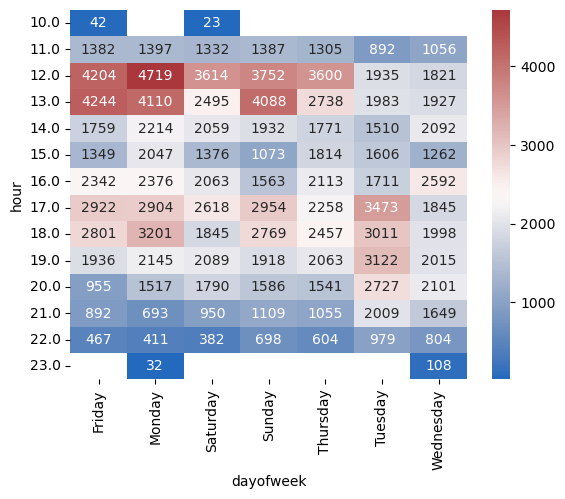

In [108]:
import seaborn as sns 
sns.heatmap(
df_menu_order.pivot_table(
    index="hour",
    columns="dayofweek",
    values="total_revenue",
    aggfunc="sum").round(),
    annot=True,
    fmt="g",
    cmap="vlag"
)